In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def forward_kinematics(angles: np.array):
    """_summary_

    Args:
        angles (np.array): shape (num_arms, num_joints)

    Returns:
        _type_: _description_
    """
    num_arms, n_joints = angles.shape
    positions = np.zeros((num_arms, n_joints + 1, 2))

    for idx in range(n_joints):
        origin = positions[:, idx]

        # new position
        new_pos = np.array([np.cos(angles[:, idx]), np.sin(angles[:, idx])]).T
        
        # translate position
        new_pos += origin

        positions[:, idx + 1] = new_pos

    return positions

In [4]:
# sample actions
num_actions = 1_00_000
n_joints = 10

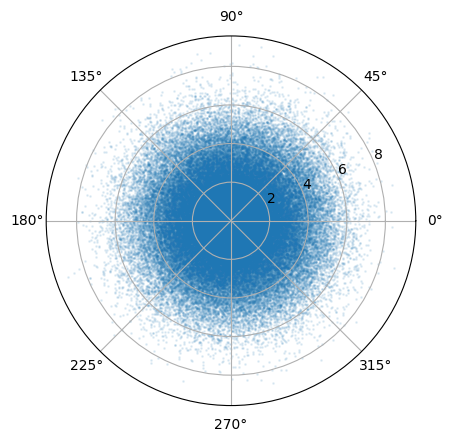

In [5]:
actions = np.random.uniform(0, np.pi * 2, size=(num_actions, n_joints))

fig = plt.figure()
ax = fig.add_subplot(projection='polar')

pos = forward_kinematics(actions)
# extract endpositions
end_pos = pos[:, -1]
# calculate values for polar plot
radius = np.sqrt(np.power(end_pos[:, 0], 2) + np.power(end_pos[:, 1], 2))
theta = np.arctan2(end_pos[:, 1], end_pos[:, 0])
ax.scatter(theta, radius, 1, alpha=0.1)



<AxesSubplot: xlabel='x', ylabel='y'>

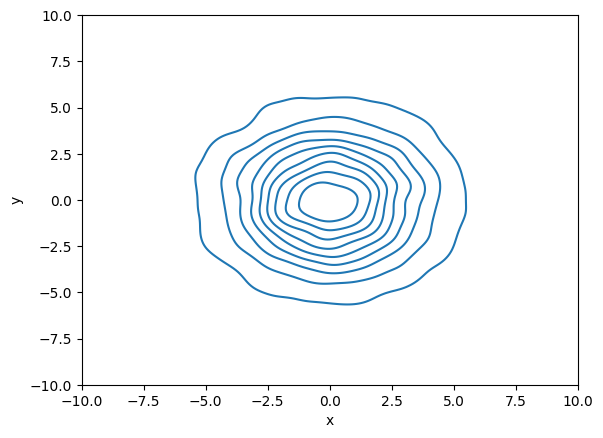

In [6]:
actions = np.random.uniform(0, np.pi * 2, size=(10000, n_joints))

fig = plt.figure()
ax = fig.add_subplot()

ax.set_ylim([-10, 10])
ax.set_xlim([-10, 10])

pos = forward_kinematics(actions)
end_pos = pos[:, -1, :]

import pandas as pd
df = pd.DataFrame(end_pos)
df.columns = ["x", "y"]

import seaborn as sns
sns.kdeplot(df, x="x", y="y", ax=ax)

<AxesSubplot: xlabel='x', ylabel='y'>

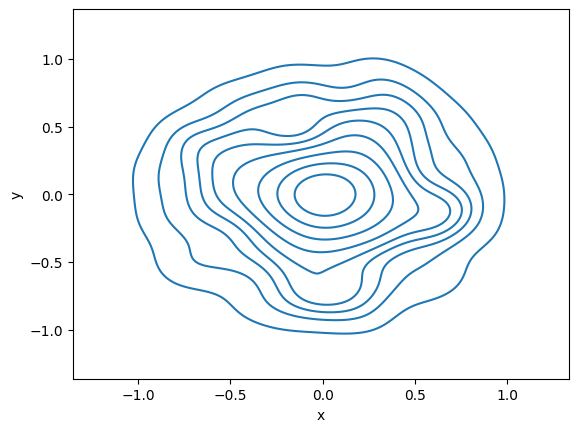

In [7]:
# sample uniform over the circular space
target_theta = np.random.uniform(0, 2 * np.pi, (1000))
target_radius = np.random.uniform(0, 1, (1000))

x_target = np.cos(target_theta) * target_radius
y_target = np.sin(target_theta) * target_radius

df = pd.DataFrame(np.stack([x_target, y_target], axis=1))
df.columns = ["x", "y"]

sns.kdeplot(df, x="x", y="y")

exctract distribution of x and y positions

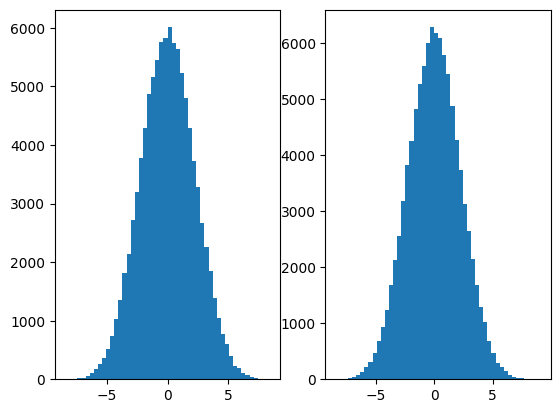

In [8]:
x = radius * np.cos(theta)
y = radius * np.sin(theta)

fig, axs = plt.subplots(1, 2)
axs[0].hist(x, bins=50)
axs[1].hist(y, bins=50)

x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.mean()

print()

In [9]:
decay = 0.5
# Doing the same thing but with a multi variate distribution... 
loc = np.zeros(n_joints)

# ... first time with a  sparse covariance matrix...
cov_matrix = np.eye(n_joints)
# add sparse diagonals
above = np.eye(n_joints) * decay
above = np.concatenate([above[1:], np.zeros((1, n_joints))])

below = np.eye(n_joints) * decay
below = np.concatenate([np.zeros((1, n_joints)), below[:-1]])

cov_matrix = cov_matrix + above + below

actions = np.random.multivariate_normal(np.zeros(n_joints), cov_matrix)
    

# ... second time with exp decay matrix



Following script is to determine the mean and std deviation if we sample an action (joint andlges) with mu_pi and std_pi as the the output from a policy pi

If we find a closed form -> we can efficiently find the mean end position and its std what we can therefor use as an input for the InformedMultiAgent

Maybe with a markov process

In [10]:
# sample actions from normal distribution
mu = np.array(range(3))
std = np.array(range(3))
actions = np.random.normal(0, 1, (100000, 3))

print(actions.shape)
print(actions.mean(axis=0))

pos = forward_kinematics(actions)
end_pos = pos[:, -1]
print(end_pos.mean(axis=0))
end_pos.std(axis=0)

(100000, 3)
[ 0.00093476  0.00986664 -0.00456562]
[1.81739487 0.00412173]


array([0.77600981, 1.14130207])